<a href="https://colab.research.google.com/github/Tchouanga12/Tchouanga.ai/blob/main/neural_network_for_fun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Defining X values

In [6]:
X =  [[1,1,0],[0,1,1],[1,0,1],[1,0,0],[0,0,1]]
X = np.array(X)
X.shape

(5, 3)

In [32]:
X

array([[1, 1, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 0, 0],
       [0, 0, 1]])

In [ ]:
y = [1,0,1,1,0]
y= np.array(y)
y.shape

In [105]:
y = np.expand_dims(y, axis = 1)

Defining the weight and bias values

In [ ]:
class FranckNet:
  """
  Neural net logistic regression classification using 
  binary cross-entropy as loss calculation.
  """

  def __init__(self,X,y,learning_rate,num_epoch):
    """
    Parameter initialization for the neural
    network proper functioning.
    """
    self.w = np.random.normal(0,0.01,(X.shape[1],1))
    self.b = np.zeros(1)
    self.m = X.shape[0]
    self.X = X
    self.y = y
    self.lr = learning_rate
    self.n = num_epoch

  def sigmoid(self,z):
    """
    function operation to gather all output from
    the neural computational operation to fall
    within the range of 0 to 1.
    """
    return 1/(1+np.exp(-z))

  def net(self,X,w,b):
    """
    Neural linear computational operation between input data,
    the weight and the bias
    """
    return sigmoid(np.dot(X,w)+b)

  def binary_cross_entropy(self,y_hat):
    """
    loss calculation. The use of binary cross entropy due to the 
    """
    return -1/self.X.shape[0]*(np.sum((self.y*np.log(y_hat))+((1-self.y)*np.log(1-y_hat))))

  def forward_pass(self,w,b,X,y):

    y_hat = self.net(self.X,self.w,self.b)
    loss = self.binary_cross_entropy(y_hat,self.y)

    dw = np.dot(self.X.T,(y_hat-y))
    db = 1/self.m*(np.sum(y_hat-self.y))

    return dw, db, loss

  def optimize(self):
    losses = []
    for i in range(self.n):
      dw, db, loss = forward_pass(self.w,self.b,self.X,self.y)
      
      w = self.w - dw*self.lr
      b = self.b - db*self.lr

      if i%5 == 0:
        print('loss after iteration %i: %f' %(i,loss))
      losses.append(loss)
    params = {'w':w, 'b':b}

    grads = {'dw':dw, 'db':db}

    return losses, params, grads

  def predict(self):

    y_pred = np.zeros(self.y.shape)
    y_hat = self.net()

    for i in range(y_hat.shape[0]):
      y_pred[i] = 1 if y_hat[i]>0.5 else 0

    return y_pred

  def train(self):
    losses, params, grads = self.optimize()

    self.w = params['w']
    self.b = params['b']

    y_pred = self.predict()

    print(f'Accuracy: {100 - np.mean(np.abs(y_pred -y))*100}%')

    return {'losses':losses, 'y_pred':y_pred, 'w':w, 'b':b, 'learning_rate':self.lr, 'epochs':self.n}

In [12]:
w = np.random.normal(0,0.01,(X.shape[1],1))
b = np.zeros(1)

In [45]:
w.shape

(3, 1)

Defining the linear regression operation 

In [83]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

Defining neural operation

In [84]:
def net(X,w,b):
  return sigmoid(np.dot(X,w)+b)

Defining loss function to calculate error rate

In [79]:
def binary_cross_entropy(y_hat,y):
  return -1/X.shape[0]*(np.sum((y*np.log(y_hat))+((1-y)*np.log(1-y_hat))))

In [124]:
def forward_pass(w,b,X,y):

  m = X.shape[0]
  y_hat = net(X,w,b)
  loss = binary_cross_entropy(y_hat,y)

  dw = np.dot(X.T,(y_hat-y))
  db = 1/m*(np.sum(y_hat-y))

  return dw, db, loss

In [218]:
def optimize(learning_rate,num_epoch,w,b,X,y):
  losses = []
  for i in range(num_epoch):
    dw, db, loss = forward_pass(w,b,X,y)
    
    w = w - dw*learning_rate
    b = b - db*learning_rate
    y_pred = predict(w,b,X)
  
    if i%5 == 0:
      print('loss after iteration %i: %f' %(i,loss))
    losses.append(loss)
  params = {'w':w, 'b':b}

  grads = {'dw':dw, 'db':db}



  return losses, params, grads

In [219]:
losses, params, grads = optimize(0.3,10,w,b,X,y)

loss after iteration 0: 0.698016
loss after iteration 5: 0.304087


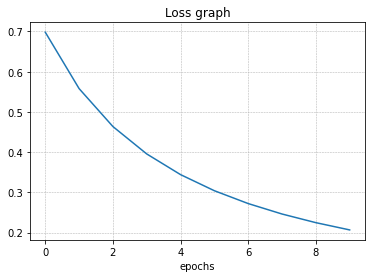

In [215]:
plt.plot(losses, label=['loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

In [187]:
def predict(w,b,X):
  y_pred = np.zeros(y.shape)
  y_hat = net(X,w,b)

  for i in range(y_hat.shape[0]):
    y_pred[i] = 1 if y_hat[i]>0.5 else 0
  return y_pred

In [225]:
def train(learning_rate,num_epoch,w,b,X,y):
  losses, params, grads = optimize(learning_rate,num_epoch,w,b,X,y)

  w = params['w']
  b = params['b']

  y_pred = predict(w,b,X)

  print(f'Accuracy: {100 - np.mean(np.abs(y_pred -y))*100}%')

  return {'losses':losses, 'y_pred':y_pred, 'y':y, 'w':w, 'b':b, 'learning_rate':learning_rate, 'epochs':num_epoch}



In [226]:
train(0.3,10,w,b,X,y)

loss after iteration 0: 0.698016
loss after iteration 5: 0.304087
Accuracy: 100.0%


{'b': array([0.04934515]),
 'epochs': 10,
 'learning_rate': 0.3,
 'losses': [0.6980161129407105,
  0.5578740329851817,
  0.46357757650248027,
  0.3955036065200308,
  0.34410506028287796,
  0.304086686343966,
  0.272175580149628,
  0.24621605178356665,
  0.224732229893992,
  0.20668505868534162],
 'w': array([[ 2.35809025],
        [-0.30649885],
        [-1.15655919]]),
 'y': array([[1],
        [0],
        [1],
        [1],
        [0]]),
 'y_pred': array([[1.],
        [0.],
        [1.],
        [1.],
        [0.]])}

Defining the validation set

In [162]:
X_val = np.round(np.random.rand(*X.shape))